# Simple Linear Regression with Salary Dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

print('Pandas version :', pd.__version__)
print('Numpy version  :', np.__version__)
print('Matplot version:', matplotlib.__version__);
print('Seaborn version:', sns.__version__)
print('Sklearn version:', sk.__version__)

print('--------------')
print(pd.Timestamp.now())

In [2]:
df = pd.read_csv('../Data/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [3]:
df.shape

(30, 2)

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

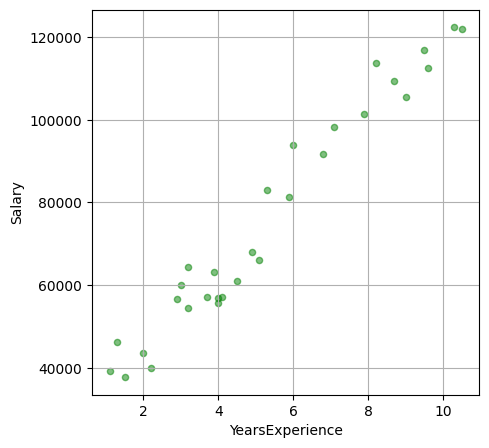

In [6]:
df.plot(x='YearsExperience', y='Salary', grid=True, kind='scatter', alpha=0.5, color='green', figsize=(5,5))

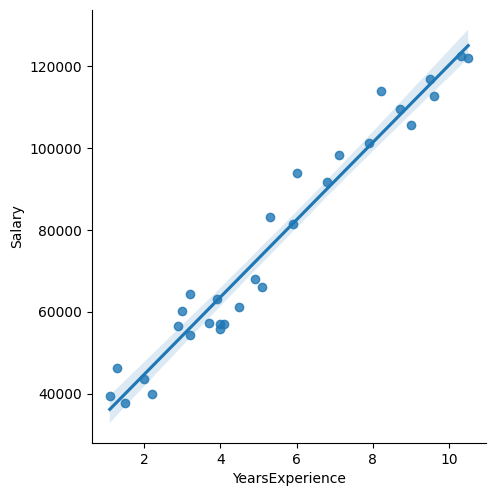

In [7]:
sns.pairplot(df, x_vars='YearsExperience', y_vars='Salary', height=5, kind='reg')

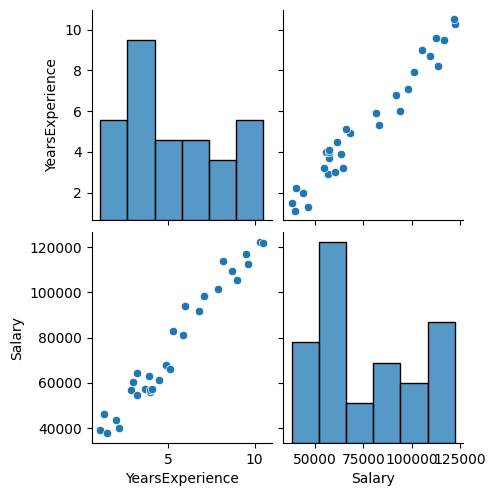

In [8]:
sns.pairplot(df)

<Axes: xlabel='Salary', ylabel='Count'>

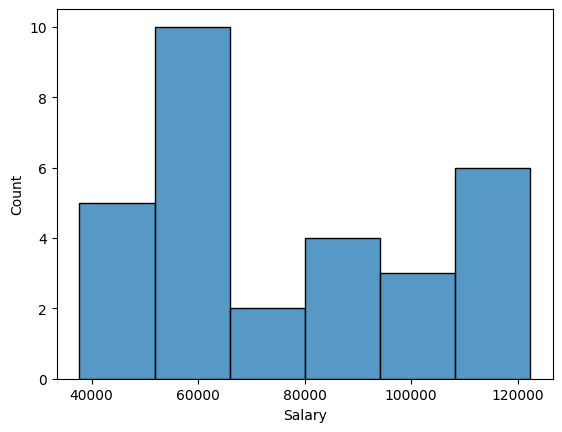

In [9]:
sns.histplot(df.Salary)

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

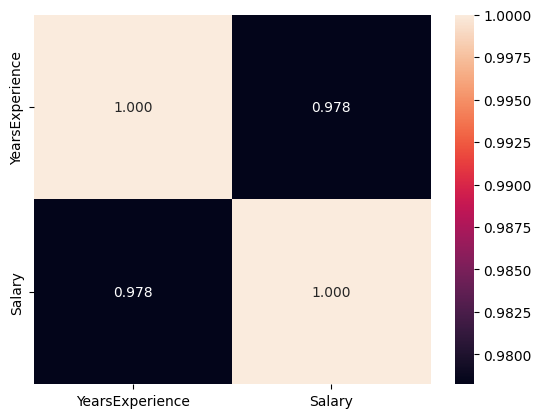

In [11]:
sns.heatmap(df.corr(), annot=True, fmt='.3f')

In [12]:
y= df.Salary
X=df.YearsExperience
y.shape, X.shape

((30,), (30,))

In [13]:
X=pd.DataFrame(X)

In [14]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

X_train.head()

,YearsExperience
28,10.3
24,8.7
12,4.0
0,1.1
4,2.2


In [17]:
y_train.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [19]:
lm.fit(X, y)

LinearRegression()

In [20]:
y_preds = lm.predict(X_test)
y_preds

array([116511.83848464,  72097.0155738 , 103281.8912346 ,  75877.00050238,
        56032.07962732,  60757.06078805])

In [21]:
residual = y_test - y_preds
residual

27    -3876.838485
15    -4159.015574
23    10530.108765
17     7210.999498
8      8412.920373
9     -3568.060788
Name: Salary, dtype: float64

In [22]:
lm.intercept_

np.float64(25792.20019866871)

In [23]:
lm.coef_

array([9449.96232146])

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

mae = mean_absolute_error(y_test, y_preds)
mae

np.float64(6292.99058036377)

In [25]:
# compute MAE "manually" .. also verified MSE and RMSE manually
total = 0
for i in range(0, len(y_preds)):
    #print('Predicted %8.2f' %y_preds[i])
    #print('Actual %8.2f' %y_test.iloc[i])
    dif = y_test.iloc[i]-y_preds[i]
    total += abs(dif)
    #print('Diff %8.2f' %dif)
    #print()

print()
print('Total   %8.2f' %total)
print('Average %8.2f' %(total/len(y_preds)))


Total   37757.94
Average  6292.99


In [26]:
mse = mean_squared_error(y_test, y_preds)
mse
                        

np.float64(46452879.75484803)

In [27]:
math.sqrt(mse)

6815.634948766551

In [28]:
r2 = r2_score(y_test, y_preds)
r2

0.9090578530656058

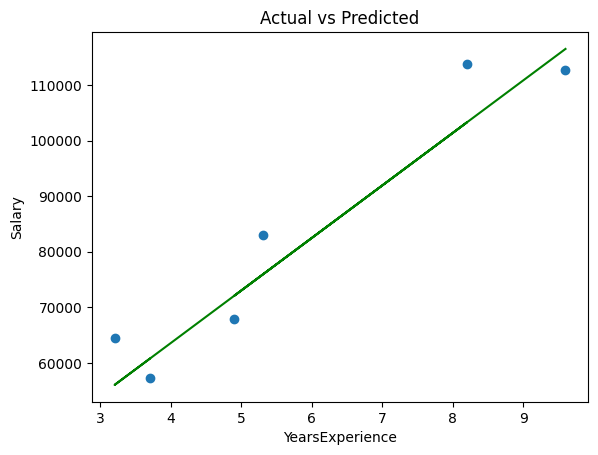

In [29]:
# this is our test data, so real/actual inputs and output, sort of linear, what we
# are trying to model.
plt.scatter(X_test, y_test)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted')

# this will be a straight line BECAUSE it's based on our LINEAR model we built.
# When given the test input (X_test) it will predict y (y_preds) based on a linear
# model, hence a straigh line :)
plt.plot(X_test, y_preds, color='green')

## THIS GRAPH REALLY BELONGS INTO THE EDA SECTION

<Axes: xlabel='YearsExperience', ylabel='Salary'>

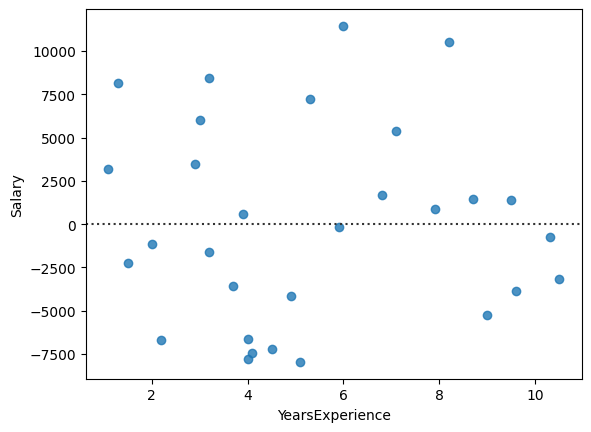

In [30]:
# this function does a LinearRegression in the background and then displays the residual
# since there's no pattern, and the points are mostly evenly distributed around zero, this means
# the linear model is a good fit. Using ALL data - no splitting of data.

sns.residplot(x='YearsExperience', y='Salary', data=df)

Text(0.5, 1.0, 'Residuals')

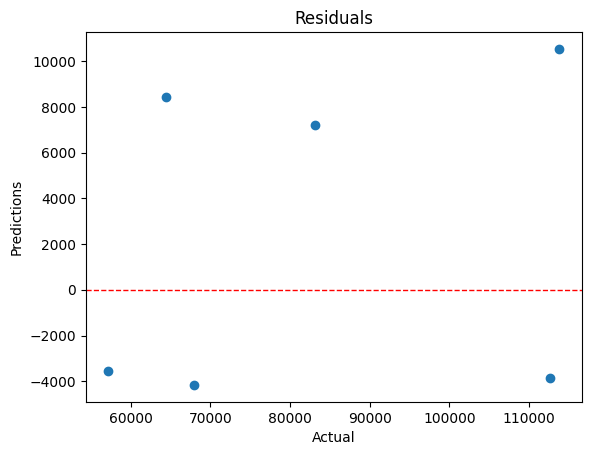

In [31]:
plt.scatter(y_test, residual)
# Add a constant line at y = 0
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.title('Residuals')

In [32]:
lm.coef_

array([9449.96232146])

In [33]:
lm.intercept_


np.float64(25792.20019866871)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

# variance of the target explained by the independent variables.
# how well the model fits the data. Higher is better.
r2 = r2_score(y_test, y_preds) 

# Average squared distance between predicted and actual values
# Lower is better  (outliers will exegarate this)
mse = mean_squared_error(y_test, y_preds)

# Average absolute distance between predicted and actual values
# Lower is better
mae = mean_absolute_error(y_test, y_preds)

# Starting point of the regression line on the y-axis.
# value of target when independent variables are at zero
intercept = lm.intercept_

print('R2   : %14.3f' %r2)  # same as linreg.score() 
print('MAE  : %14.3f' %mae)
print('MSE  : %14.3f' %mse)
print('RMSE : %14.3f' %math.sqrt(mse))
print('Int  : %14.3f' %intercept)
print('Coef : %14.3f' %lm.coef_[0])
print('Score: %14.3f' %lm.score(X_test, y_test))

R2   :          0.909
MAE  :       6292.991
MSE  :   46452879.755
RMSE :       6815.635
Int  :      25792.200
Coef :       9449.962
Score:          0.909


In [37]:
type(X_test)

pandas.core.frame.DataFrame